# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Load The Dataset

In [2]:
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/Fake_News_Detection/fake_and_real_news.csv', on_bad_lines='skip')
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [3]:
print("Shape of dataset = ",df.shape)

Shape of dataset =  (9900, 2)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [5]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [6]:
df.tail()

,Text,label
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake
9899,Sean Spicer HILARIOUSLY Branded As Chickensh*...,Fake


In [7]:
df.columns

Index(['Text', 'label'], dtype='object')

# Check for Null values

In [8]:
df.isna().sum()

Text     0
label    0
dtype: int64

In [9]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

# Label Encoding


In [10]:
df['label'] = df['label'].map({'Fake':0, 'Real':1})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2856\3741215519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette={'1': 'r', '0': 'g'})


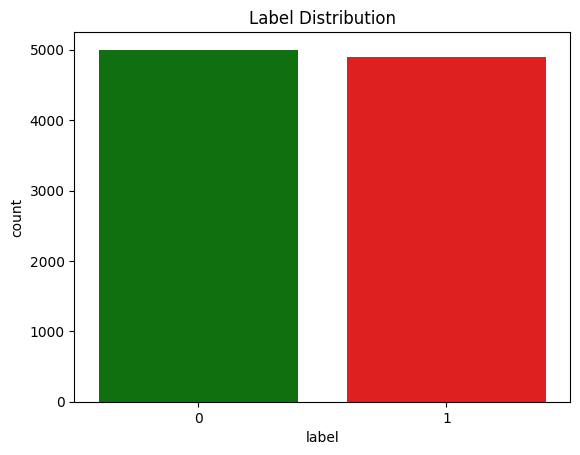

In [11]:
sns.countplot(x='label', data=df, palette={'1': 'r', '0': 'g'})
plt.title("Label Distribution")
plt.show()

# Splitting into input and output

In [12]:
x = df['Text']
y = df['label']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Vectorize The Text

- used TF-IDF to convert text column to numerical form

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Building The ML Model

In [15]:
model = LogisticRegression()
model.fit(x_train_vec,y_train)

LogisticRegression()

# Evaluating The Model

In [16]:
y_pred = model.predict(x_test_vec)

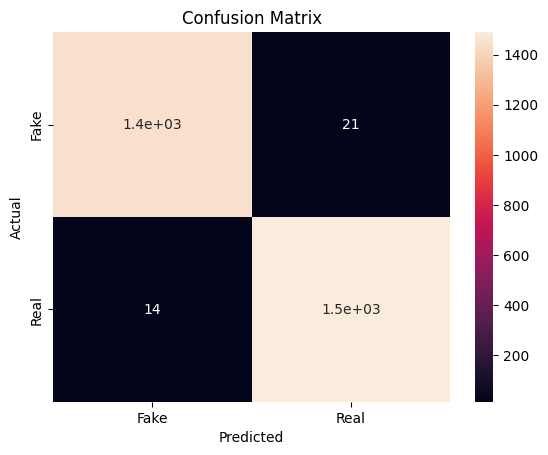

In [17]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print("Accuracy = ",accuracy_score(y_test,y_pred))
print("Classification Report :\n", classification_report(y_test,y_pred))

Accuracy =  0.9882154882154882
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1466
           1       0.99      0.99      0.99      1504

    accuracy                           0.99      2970
   macro avg       0.99      0.99      0.99      2970
weighted avg       0.99      0.99      0.99      2970



# Making Custom Prediction

In [19]:
def predict_news(news_text):
    vec = vectorizer.transform([news_text])
    pred = model.predict(vec)
    return "Real" if pred[0] == 1 else "Fake"

# Example
predict_news("Breaking: President announces new economic reforms.")

'Real'